In [1]:
# ==============================
# PROBLEM 3b
# ==============================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("Housing.csv")

# Extended features
features_3b = [
    "area", "bedrooms", "bathrooms", "stories",
    "mainroad", "guestroom", "basement",
    "hotwaterheating", "airconditioning",
    "parking", "prefarea"
]

X = df[features_3b].copy()
y = df["price"].values.astype(float)

# Encode yes/no categorical variables
binary_cols = ["mainroad", "guestroom", "basement",
               "hotwaterheating", "airconditioning", "prefarea"]

for col in binary_cols:
    X[col] = X[col].map({"yes": 1, "no": 0})

X = X.values.astype(float)

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Standardize features
mean_vals = X_train.mean(axis=0)
std_vals = X_train.std(axis=0)
X_train_std = (X_train - mean_vals) / std_vals
X_val_std = (X_val - mean_vals) / std_vals

# Add bias
def add_bias(X):
    return np.c_[np.ones(X.shape[0]), X]

X_train_b = add_bias(X_train_std)
X_val_b = add_bias(X_val_std)


In [2]:
def gradient_descent_penalty(X_train, y_train, X_val, y_val, lr=0.05, n_iter=500, lam=0.1):
    m, n = X_train.shape
    theta = np.zeros(n)
    train_losses, val_losses = [], []

    for i in range(n_iter):
        # Predictions
        y_pred = X_train @ theta
        error = y_pred - y_train

        # Gradient with penalty (L2)
        grad = (2/m) * (X_train.T @ error) + 2 * lam * theta
        grad[0] -= 2 * lam * theta[0]  # don't penalize bias

        # Update
        theta -= lr * grad

        # Training loss (with penalty)
        train_loss = np.mean((X_train @ theta - y_train) ** 2) + lam * np.sum(theta[1:]**2)

        # Validation loss (no penalty)
        val_loss = np.mean((X_val @ theta - y_val) ** 2)

        train_losses.append(train_loss)
        val_losses.append(val_loss)

    return theta, train_losses, val_losses


In [3]:
def gradient_descent(X_train, y_train, X_val, y_val, lr=0.05, n_iter=500):
    m, n = X_train.shape
    theta = np.zeros(n)
    train_losses, val_losses = [], []
    for i in range(n_iter):
        y_pred = X_train @ theta
        error = y_pred - y_train
        grad = (2/m) * (X_train.T @ error)
        theta -= lr * grad
        train_loss = np.mean((X_train @ theta - y_train) ** 2)
        val_loss = np.mean((X_val @ theta - y_val) ** 2)
        train_losses.append(train_loss)
        val_losses.append(val_loss)
    return theta, train_losses, val_losses

theta_base, train_base, val_base = gradient_descent(
    X_train_b, y_train, X_val_b, y_val, lr=0.05, n_iter=500
)


In [4]:
theta_pen, train_pen, val_pen = gradient_descent_penalty(
    X_train_b, y_train, X_val_b, y_val, lr=0.05, n_iter=500, lam=0.1
)


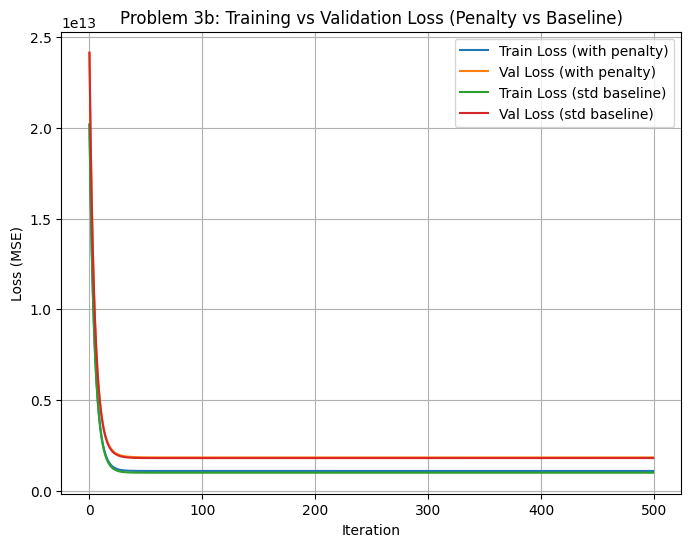

In [5]:
plt.figure(figsize=(8,6))
plt.plot(train_pen, label="Train Loss (with penalty)")
plt.plot(val_pen, label="Val Loss (with penalty)")
plt.plot(train_base, label="Train Loss (std baseline)")
plt.plot(val_base, label="Val Loss (std baseline)")
plt.xlabel("Iteration")
plt.ylabel("Loss (MSE)")
plt.title("Problem 3b: Training vs Validation Loss (Penalty vs Baseline)")
plt.legend()
plt.grid(True)
plt.show()


In [6]:
print("With Penalty:")
print("Final Parameters:", theta_pen)
print("Final Training Loss:", train_pen[-1])
print("Final Validation Loss:", val_pen[-1])
print("="*60)

print("Standardization Baseline (2b):")
print("Final Parameters:", theta_base)
print("Final Training Loss:", train_base[-1])
print("Final Validation Loss:", val_base[-1])


With Penalty:
Final Parameters: [4706527.3853211   483299.10281255   89415.7428902   490099.98064622
  335005.08211971  151333.60426295  105795.43838432  186243.88191143
  140713.19277859  356470.9336849   213217.69013748  252183.6811268 ]
Final Training Loss: 1090329868382.9674
Final Validation Loss: 1835895327062.477
Standardization Baseline (2b):
Final Parameters: [4706527.3853211   523387.27548844   58623.06245176  528975.1075954
  365907.58043609  144130.60780487   93366.5047969   208520.89032996
  155907.28690611  372995.82851972  211306.48839562  269576.1656442 ]
Final Training Loss: 992481000009.7854
Final Validation Loss: 1800793719683.9543
